# 의사결정트리 회귀 기본 코드

## #01. 준비작업

### [1] 패키지 가져오기

In [8]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.regression import *

from sklearn.svm import SVR

### [2] 데이터 가져오기

In [9]:
origin = my_read_excel("https://data.hossam.kr/mldata/fish.xlsx", info=False)

## #02. 데이터 전처리

### [1] 훈련, 검증 데이터 분리 + 스케일링

In [10]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, yname='무게', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((44, 3), (12, 3), (44,), (12,))

## #03. SVR

### [1] 분류 모델 구현

| 하이퍼파라미터 | 기능 | 기본값 | 추천값과 설명 |
|---|---|---|---|
| `C` | 오류 항에 대한 페널티를 결정한다. 값이 클수록 오류에 대한 페널티가 커진다. | `1.0` | -`0.1`: 더 강한 정규화를 원할 때 사용<br/>-`1.0`: 기본값, 균형 잡힌 정규화.<br/>-`10`: 오류에 더 유연하게 대응하고자 할 때 사용. |
| `kernel` | 알고리즘에 사용할 커널 유형 | `rbf` | -`linear`: 선형 분류 문제.<br/>-`poly`: 다항식 커널, 복잡한 데이터셋에 적합<br/>-`rbf`: 기본값, 비선형 문제에 좋음<br/>-`sigmoid`: 신경망과 유사한 효과. |
| `degree` | `kernel='poly'`일 때 다항식의 차수를 결정한다. 높은 차수는 더 복잡한 결정 경계를 만든다. | `3` | -`3`: 기본값, 대부분의 경우에 적합<br/> -`2`, `4`, `5`: 데이터의 특성과 복잡성에 따라 조정.                                    |
| `gamma` | `kernel='rbf'`, `poly` 및 `sigmoid`에 대한 커널 계수를 결정한다. 값이 클수록 결정 경계가 더 복잡해진다. | `scale` | -`auto`: 특성 수의 역수로 설정<br/>-`scale`: `1 / (n_features * X.var())`로 설정, 데이터의 스케일에 따라 조정.                 |
| `coef0` | `kernel='poly'`와 `sigmoid`에서 독립 항을 결정한다. 커널 함수의 독립적인 항을 조절한다. | `0` | -`0`: 기본값, 대부분의 경우에 적합<br/>-`0.01`, `10`, `-10`: 커널 함수에 따라 실험적으로 조정할 수 있음.                      |
| `shrinking` | 최적화를 위한 축소 휴리스틱을 사용할지 여부를 결정한다. | `True`| -`True`: 기본값, 대부분의 경우에 적합<br/>-`False`: 축소 휴리스틱을 사용하지 않을 경우. |
| ~~`probability`~~ | ~~클래스 멤버십 확률을 추정할지 여부를 결정한다. 확률 추정은 내부적으로 5-겹 교차 검증을 사용한다.~~  | ~~`False`~~ | -~~`False`: 기본값, 빠른 계산을 위해~~<br/>-~~`True`: 클래스 확률을 필요로 할 때 사용, 계산에 더 많은 시간이 필요함.~~ |
| `max_iter` | 솔버 내부 반복의 최대 횟수를 결정한다. `-1`은 무제한을 의미한다. | `-1`  | -`-1`: 기본값, 반복에 제한 없음<br/>-`1000`<br/>-`10000`: 특정 반복 횟수 내에서 수렴하도록 제한하고 싶을 때 사용.                     |


In [11]:
estimator = SVR(
    C=1.0, 
    kernel='rbf', 
    degree=3, 
    gamma='scale', 
    coef0=0.0, 
    shrinking=True, 
    max_iter=-1)

estimator.fit(x_train, y_train)
print("훈련데이터 점수: ", estimator.score(x_train, y_train))
print("검증데이터 점수: ", estimator.score(x_test, y_test))

훈련데이터 점수:  -0.1452079456277815
검증데이터 점수:  -0.38555347736861645


### [2] 성능평가

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |    -0.145208 |    -0.385553 |
| 평균절대오차(MAE)             |      251.102 |      287.356 |
| 평균제곱오차(MSE)             |       134673 |       163482 |
| 평균오차(RMSE)                |      366.979 |       404.33 |
| 평균 절대 백분오차 비율(MAPE) |      163.469 |      55.2172 |
| 평균 비율 오차(MPE)           |     -111.356 |      9.55639 |
+-------------------------------+--------------+--------------+

[학습곡선]


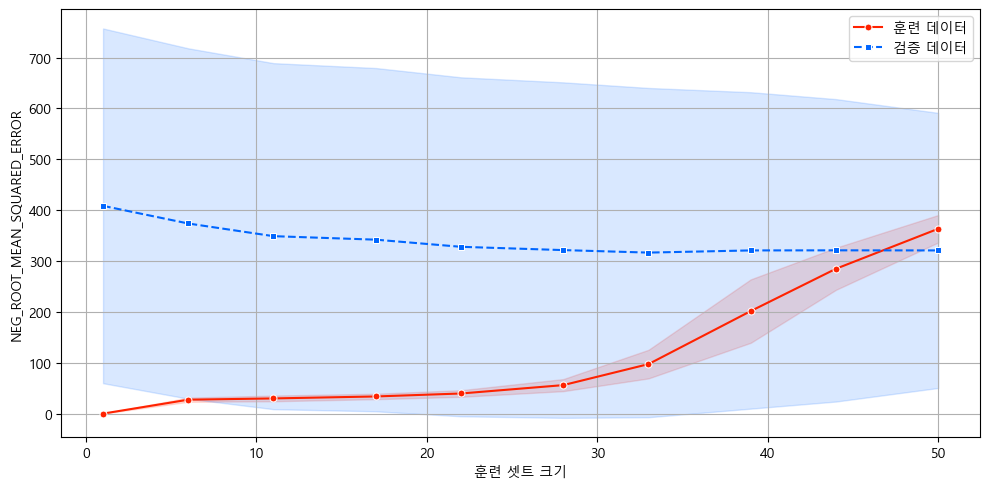

In [12]:
my_regression_result(estimator, x_train, y_train, x_test, y_test)

## #04. 모듈화 기능 확인

### [1] SVR

SVR {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [2, 3, 4, 5]}
[교차검증 TOP5]
+----+----------+----------+-----+-------------------+
|    | kernel   |   degree |   C |   mean_test_score |
|----+----------+----------+-----+-------------------|
| 35 | sigmoid  |        5 |  10 |          0.549307 |
| 32 | sigmoid  |        4 |  10 |          0.549307 |
| 29 | sigmoid  |        3 |  10 |          0.549307 |
| 26 | sigmoid  |        2 |  10 |          0.549307 |
| 28 | poly     |        3 |  10 |          0.417828 |
+----+----------+----------+-----+-------------------+

[Best Params]
{'kernel': 'sigmoid', 'degree': 2, 'C': 10}

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.642159 |     0.571041 |
| 평균절대오차(MAE)             |      112.957 |      138.663 |
| 평균제곱오차(MSE)             |      42

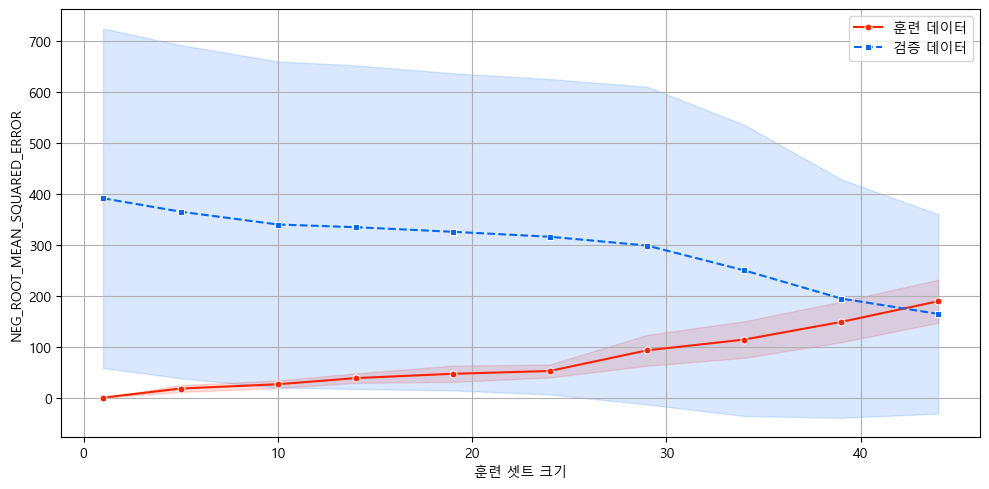


+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | 무게       | 길이       | 25.2841 |
|  1 | 무게       | 높이       | 63.9335 |
|  2 | 무게       | 두께       | 25.8528 |
+----+------------+------------+---------+



SVR(C=10, degree=2, kernel='sigmoid')

In [13]:
my_svr_regression(x_train, y_train, x_test, y_test)

### [2] 지금까지의 모든 예측 모형 비교

In [14]:
my_regression(x_train, y_train, x_test, y_test)

LinearRegression의 n_jobs 설정됨
LinearRegression {}
Ridge의 random_state 설정됨
Ridge {'alpha': [0.01, 0.1, 1, 10, 100]}
Lasso의 random_state 설정됨
Lasso {'alpha': [0.01, 0.1, 1, 10, 100]}
KNeighborsRegressor의 n_jobs 설정됨
KNeighborsRegressor {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
DecisionTreeRegressor의 random_state 설정됨
DecisionTreeRegressor {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
SVR {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [2, 3, 4, 5]}
+-----------------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|                       |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|-----------------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------

{'LinearRegression': LinearRegression(n_jobs=-1),
 'DecisionTreeRegressor': DecisionTreeRegressor(criterion='absolute_error', random_state=1234),
 'Lasso': Lasso(alpha=10, random_state=1234),
 'Ridge': Ridge(alpha=10, random_state=1234),
 'SVR': SVR(C=10, degree=2, kernel='sigmoid'),
 'KNeighborsRegressor': KNeighborsRegressor(metric='manhattan', n_jobs=-1, weights='distance')}